# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
#%pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
#29322 rows 3 columns
#df_hh_income.shape
#df_hh_income.columns
#'Geographic Area', 'City', 'Median Income'
df_hh_income.isna().sum()
#51 na values in the median income column

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [6]:
#29329 ROWS 3 columns
df_pct_completed_hs.shape
df_pct_completed_hs.columns
#'Geographic Area', 'City', 'percent_completed_hs'
df_pct_completed_hs.isna().sum()
#no na values

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

In [7]:
#df_fatalities
#2535 rows 14 columns
df_fatalities.shape
df_fatalities.columns
#'id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
#       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
#       'flee', 'body_camera'
df_fatalities.isna().sum()
#77 age,9 ared,195 race 65 flee

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [8]:
df_pct_poverty
#29329 rows 3 columns
#df_pct_poverty.shape
df_pct_poverty.columns
#'Geographic Area', 'City', 'poverty_rate'
df_pct_poverty.isna().sum()
#no na values

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [9]:
df_share_race_city
#df_share_race_city.shape
#29268 rows 7 columns
df_share_race_city.columns
#'Geographic area', 'City', 'share_white', 'share_black',
#       'share_native_american', 'share_asian', 'share_hispanic'
df_share_race_city.isna().sum()
#no na values

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
#Fatalities and hh income have missing values,lets substitute them with 0
#df.fillna(0) to fill with zeroes
df_fatalities = df_fatalities.fillna(0)
df_fatalities.isna().sum()
df_hh_income = df_hh_income.fillna(0)
df_hh_income.isna().sum()

Geographic Area    0
City               0
Median Income      0
dtype: int64

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [11]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'],errors='coerce')
poverty_per_state = df_pct_poverty.groupby('Geographic Area',as_index=False).agg({'poverty_rate':pd.Series.mean}).sort_values(by='poverty_rate',ascending=False)
poverty_per_state['poverty_rate']

25   26.88
3    25.67
10   23.78
32   23.08
2    22.96
18   22.34
40   22.16
49   21.13
36   20.66
1    20.65
24   20.11
17   20.08
43   19.92
42   19.89
0    19.85
27   19.75
13   18.24
7    18.00
22   17.90
9    17.57
4    17.12
21   16.89
37   16.52
26   16.51
41   16.03
15   15.50
47   15.02
35   14.85
16   14.76
45   14.59
14   13.88
46   13.79
23   13.75
11   13.40
5    13.36
29   12.98
48   12.86
30   12.66
8    12.56
38   12.52
33   12.47
12   12.29
28   12.16
44   11.98
34   11.67
39   10.37
20   10.31
50    9.89
19    9.59
6     9.14
31    8.19
Name: poverty_rate, dtype: float64

In [12]:
bar= px.bar(poverty_per_state, 
             x=poverty_per_state['Geographic Area'], 
             y=poverty_per_state['poverty_rate'],  
             title='Number of Launches per Organization',
             color="poverty_rate",
             color_continuous_scale='Electric'
             )
bar.update_layout(coloraxis_showscale=False, xaxis_title = "State", yaxis_title='Poverty Rate')
bar.update_layout(yaxis=dict(tickfont=dict(size=10)))
bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [13]:
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs'] != '-']
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])
graduation_per_state = df_pct_completed_hs.groupby('Geographic Area',as_index=False).agg({'percent_completed_hs':pd.Series.mean}).sort_values(by='percent_completed_hs',ascending=True)
graduation_per_state

,Geographic Area,percent_completed_hs
43,TX,75.69
25,MS,78.47
10,GA,79.01
18,LA,79.29
2,AR,79.95
1,AL,80.30
3,AZ,80.47
40,SC,80.85
32,NM,80.98
42,TN,81.63


In [14]:
bar= px.bar(graduation_per_state, 
             x=graduation_per_state['Geographic Area'], 
             y=graduation_per_state['percent_completed_hs'],  
             title='High school graduation rate',
             color="percent_completed_hs",
             color_continuous_scale='Electric'
             )
bar.update_layout(coloraxis_showscale=False, xaxis_title = "State", yaxis_title='Graduation Rate')
bar.update_layout(yaxis=dict(tickfont=dict(size=10)))
bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [15]:
#They both have the same "Geographic Area column "
#poverty_per_state graduation_per_state
poverty_highschool = poverty_per_state.merge(graduation_per_state, on='Geographic Area')
poverty_highschool


,Geographic Area,poverty_rate,percent_completed_hs
0,MS,26.88,78.47
1,AZ,25.67,80.47
2,GA,23.78,79.01
3,NM,23.08,80.98
4,AR,22.96,79.95
5,LA,22.34,79.29
6,SC,22.16,80.85
7,WV,21.13,82.35
8,OK,20.66,82.91
9,AL,20.65,80.30


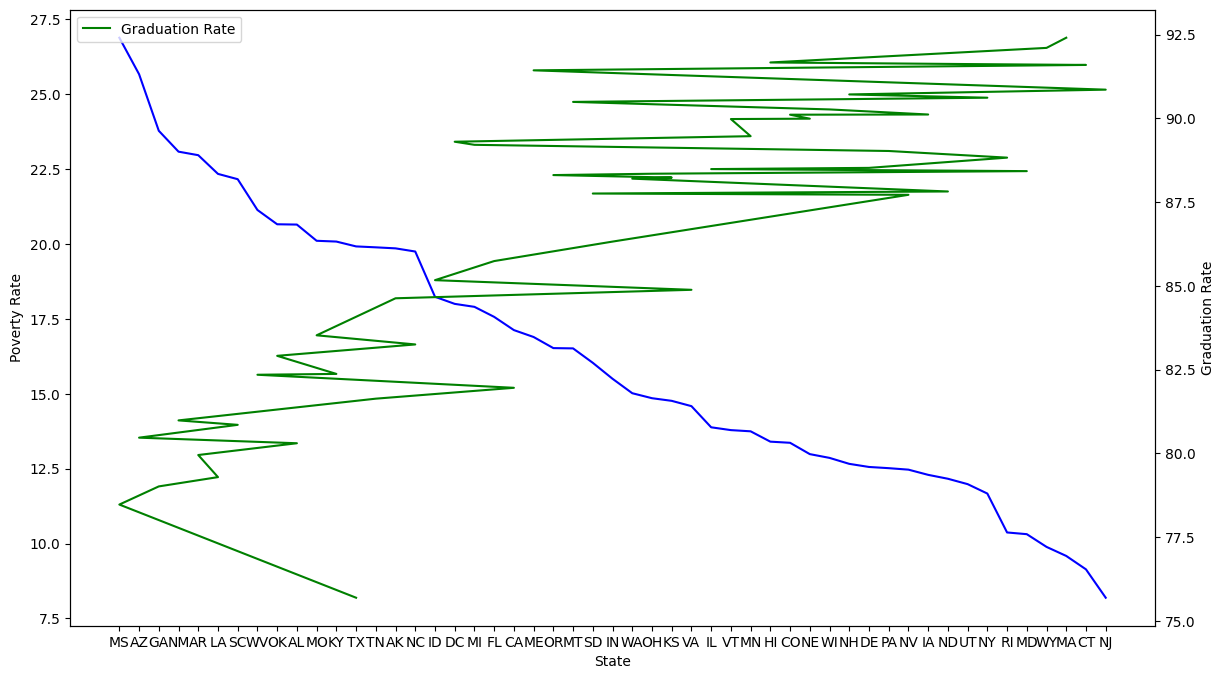

In [16]:
# create a figure with 2 y-axes
fig, ax1 = plt.subplots(figsize=(14,8))
ax2 = ax1.twinx()

# plot the poverty rate on the first y-axis
ax1.plot(poverty_per_state['Geographic Area'], poverty_per_state['poverty_rate'], color='blue', label='Poverty Rate')
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate')

# plot the graduation rate on the second y-axis
ax2.plot(graduation_per_state['Geographic Area'], graduation_per_state['percent_completed_hs'], color='green', label='Graduation Rate')
ax2.set_ylabel('Graduation Rate')

plt.xticks(rotation=90)
# add a legend
plt.legend()

# show the chart
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

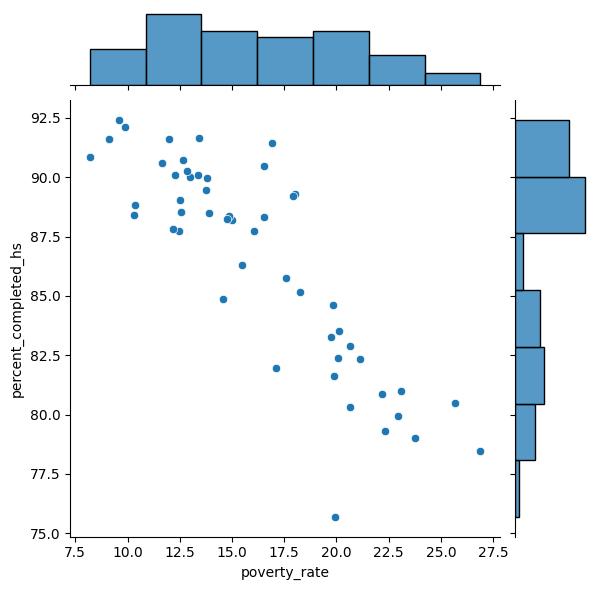

In [17]:
sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=poverty_highschool, kind='scatter')
plt.show()

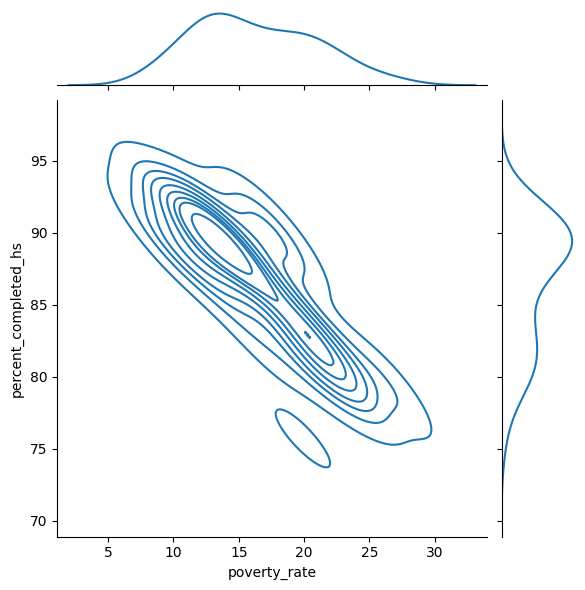

In [18]:
sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=poverty_highschool, kind='kde')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

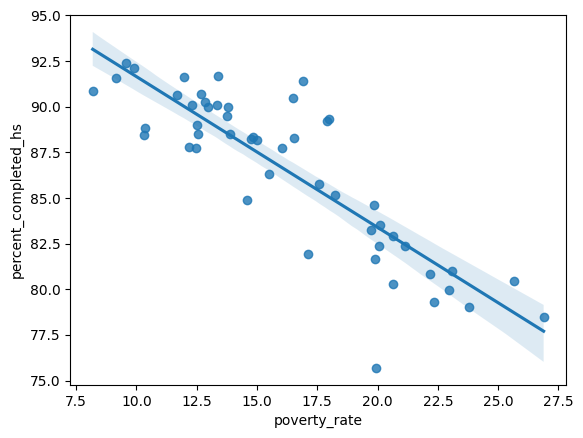

In [19]:
sns.regplot(x='poverty_rate', y='percent_completed_hs', data=poverty_highschool)
plt.show()

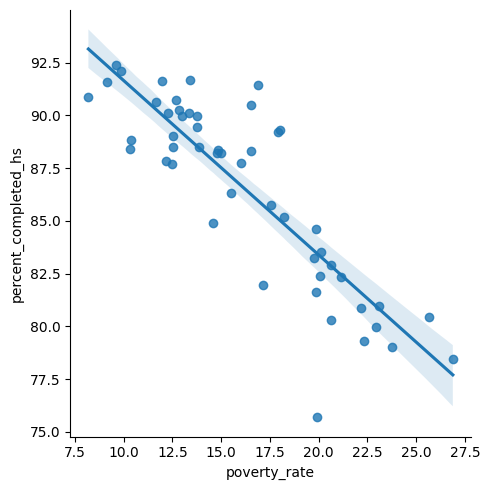

In [20]:
sns.lmplot(x='poverty_rate', y='percent_completed_hs', data=poverty_highschool)
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [21]:
#Again i will group all data by state and .agg the races with pd.series.mean
#share_white,share_black,share_native_american,share_asian,share_hispanic
#df_share_race_city.groupby('Geographic Area',as_index=False).agg({'percent_completed_hs':pd.Series.mean})
df_share_race_city[['share_white','share_black','share_native_american','share_asian','share_hispanic']] = df_share_race_city[['share_white','share_black','share_native_american','share_asian','share_hispanic']].apply(pd.to_numeric, errors='coerce')
race_states = df_share_race_city.groupby('Geographic area', as_index=False).agg({'share_white':pd.Series.mean,'share_black':pd.Series.mean,'share_native_american':pd.Series.mean,'share_asian':pd.Series.mean,'share_hispanic':pd.Series.mean})
race_states


,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65
5,CO,87.77,0.92,1.62,1.15,17.90
6,CT,86.11,4.99,0.66,2.99,7.98
7,DC,38.50,50.70,0.30,3.50,9.10
8,DE,76.25,15.39,0.52,2.00,7.42
9,FL,78.67,13.37,0.46,1.62,16.53


In [22]:
race_states[['share_white','share_black','share_native_american','share_asian','share_hispanic']] = race_states[['share_white','share_black','share_native_american','share_asian','share_hispanic']].div(race_states[['share_white','share_black','share_native_american','share_asian','share_hispanic']].sum(axis=1), axis=0).multiply(100)

fig = px.bar(race_states, x='Geographic area', y=['share_white','share_black','share_native_american','share_asian','share_hispanic'],
             labels={'Geographic area':'State','share_white':'Share White','share_black':'Share Black','share_native_american':'Share Native American','share_asian':'Share Asian','share_hispanic':'Share Hispanic'},
             title='Share of Different Races per State',
             color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_layout(yaxis_title="Share of Population",
                  barmode='stack')

fig.update_layout(width=1100)
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [23]:
#df_fatalities.groupby('race').agg({'name':pd.Series.count})
df_fatalities_agg = df_fatalities.groupby('race').agg({'name':pd.Series.count}).rename(columns={'name':'count'})
df_fatalities_agg

,count
race,
0,195
A,39
B,618
H,423
N,31
O,28
W,1201


In [24]:
import plotly.express as px

fig = px.pie(df_fatalities_agg, values='count', names=df_fatalities_agg.index,title='Deaths in Police Brutality by Race')
fig.show()

#'W' represents 'White'
#'B' represents 'Black'
#'H' represents 'Hispanic'
#'A' represents 'Asian'
#'N' represents 'Native American'
#'O' represents 'Other'

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [32]:
#continue here
df_fatalities.groupby('gender',as_index=False).count()
#2428 men vs 107 women
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [28]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

<AxesSubplot: xlabel='manner_of_death', ylabel='count'>

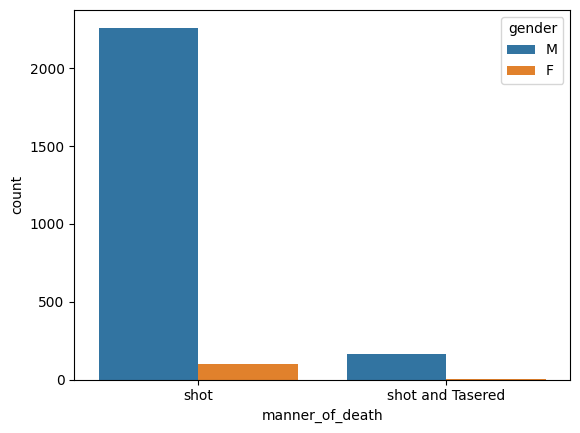

In [33]:
# boxplot wont work as it is not numerical
# df_fatalities.groupby('gender').boxplot(column=['age','manner_of_death'])
sns.countplot(x='manner_of_death', hue='gender', data=df_fatalities)

#seems women are only getting shot but the sample size is too small to draw a conclusion for them


<AxesSubplot: xlabel='manner_of_death', ylabel='age'>

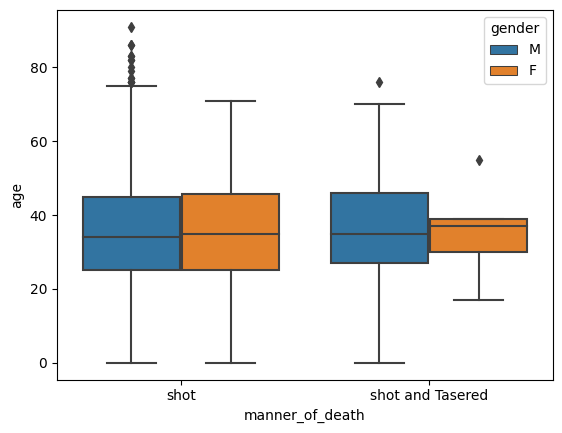

In [34]:
sns.boxplot(x='manner_of_death', y='age', data=df_fatalities, hue='gender')

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [49]:
armed_vs_unarmed = df_fatalities.groupby('armed',as_index=False).count().sort_values('id',ascending=True)
armed = armed_vs_unarmed.loc[armed_vs_unarmed['armed'] != 'unarmed']
unarmed = armed_vs_unarmed.loc[armed_vs_unarmed['armed'] == 'unarmed']

,armed,id,name,date,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
34,lawn mower blade,1,1,1,1,1,1,1,1,1,1,1,1,1
59,spear,1,1,1,1,1,1,1,1,1,1,1,1,1
60,stapler,1,1,1,1,1,1,1,1,1,1,1,1,1
38,metal hand tool,1,1,1,1,1,1,1,1,1,1,1,1,1
30,hand torch,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,toy weapon,104,104,104,104,104,104,104,104,104,104,104,104,104
66,undetermined,117,117,117,117,117,117,117,117,117,117,117,117,117
68,vehicle,177,177,177,177,177,177,177,177,177,177,177,177,177
33,knife,373,373,373,373,373,373,373,373,373,373,373,373,373


In [46]:
px.bar(armed_vs_unarmed[-20:], 
x='armed', 
y='id', 
labels={'armed':'Weapon','id':'Count'},title='Armed vs unarmed victims')

In [53]:
#armed.sum()
fig = px.pie(values=[armed['id'].sum(), unarmed['id'].sum()],
             names=['Armed', 'Unarmed'],
             title='Armed vs Unarmed Fatalities',
             labels={'value':'Fatalities'})
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [60]:
#df_fatalities.groupby('age',as_index=False).count()
#2535 rows in total
#527 under 25
len(df_fatalities[df_fatalities['age']<25]) / len(df_fatalities) * 100
#20.79% of victims were under 25

20.78895463510848

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

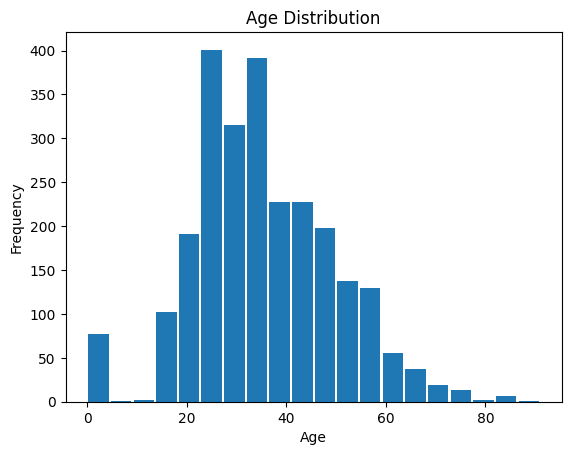

In [61]:
plt.hist(df_fatalities['age'], bins=20, rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


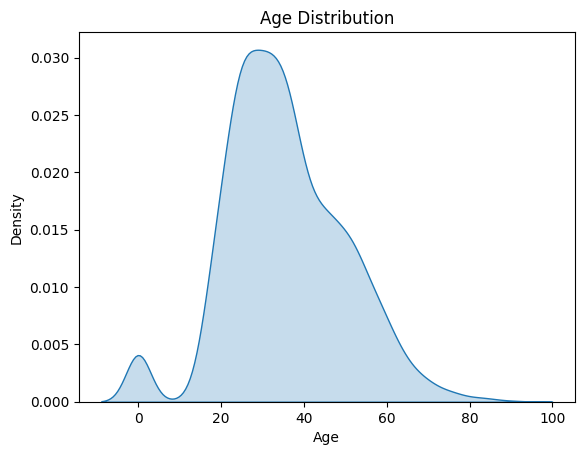

In [63]:
sns.kdeplot(df_fatalities['age'], fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

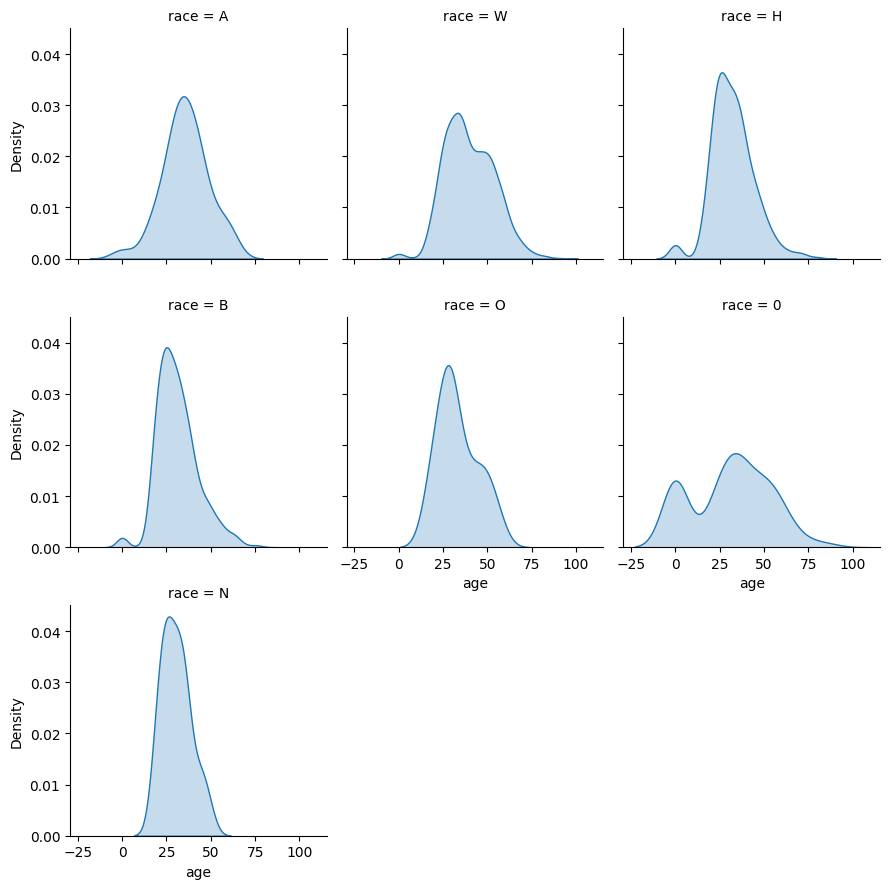

In [69]:
#df_fatalities.groupby('race').count()
g = sns.FacetGrid(df_fatalities, col="race", col_wrap=3, height=3)
g.map(sns.kdeplot, "age", fill=True)

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [72]:
fatalities_per_race = df_fatalities.groupby('race',as_index=False).count()

In [73]:
fig = px.pie(data_frame=fatalities_per_race, 
             values='id', 
             names='race',
             title='Fatality per Race')
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [77]:
signs_of_mental = df_fatalities.groupby('signs_of_mental_illness',as_index=False).count()
signs_of_mental

,signs_of_mental_illness,id,name,date,manner_of_death,armed,age,gender,race,city,state,threat_level,flee,body_camera
0,False,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902
1,True,633,633,633,633,633,633,633,633,633,633,633,633,633


In [79]:
fig = px.pie(data_frame=signs_of_mental, 
             values='id', 
             names='signs_of_mental_illness',
             title='SIgns of mental ilness in police brutality victims')
fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [84]:
top10_cities = df_fatalities.groupby('city',as_index=False).count().sort_values(by='id',ascending=True)[-10:]

In [88]:
fig = px.bar(data_frame=top10_cities, 
             x='city', 
             y='id',
             title='Top 10 Most Dangerous Cities for Police Brutality',
             labels={'id':'Number of Fatalities','city':'City'},
             color_continuous_scale='Electric')
fig.update_layout(coloraxis_showscale=False, xaxis_title = "City", yaxis_title='Number of Shootings')

fig.show()

In [90]:
fig = px.scatter(data_frame=top10_cities, 
             x='city', 
             y='id',
             title='Top 10 Most Dangerous Cities for Police Brutality',
             labels={'id':'Number of Fatalities','city':'City'},
             color='id',
             color_continuous_scale='Electric')
fig.update_layout(paper_bgcolor='#1a1a1a')

fig.show()


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [114]:
#df_share_race_city
#top10_cities['city']
cities_state = {'Austin city':'TX',
'Houston city':'TX',
'Chicago city':'IL',
'Las Vegas city':'NV',
'Phoenix city':'AZ',
'Los Angeles city':'CA',
'St. Louis city':'MO',
'Miami city':'FL',
'Columbus city':'OH',
'San Antonio city':'TX'}
top_cities = df_share_race_city.loc[df_share_race_city['City'].isin(cities_state.keys()) & df_share_race_city['Geographic area'].isin(cities_state.values())]
top_cities

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
1201,AZ,Phoenix city,65.90,6.50,2.20,3.20,40.80
2714,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50
4633,FL,Miami city,72.60,19.20,0.30,1.00,70.00
4847,FL,San Antonio city,96.50,1.10,0.00,0.40,6.10
6278,IL,Chicago city,45.00,32.90,0.50,5.50,28.90
14076,MO,Houston city,96.30,0.20,0.60,0.40,1.20
14248,MO,Miami city,97.70,0.60,0.00,0.00,1.70
14472,MO,St. Louis city,43.90,49.20,0.30,2.90,3.50
15666,NV,Las Vegas city,62.10,11.10,0.70,6.10,31.50
19379,OH,Columbus city,61.50,28.00,0.30,4.10,5.60


In [129]:
top_cities = pd.DataFrame()
for city, state in cities_state.items():
    top_cities = pd.concat([top_cities, 
    df_share_race_city.loc[(df_share_race_city['City'] == city) & (df_share_race_city['Geographic area'] == state)]], ignore_index=True)
top_cities['City'] = top_cities['City'].str.replace(' city','')
top_cities = top_cities.rename(columns={'City': 'city'})


top_cities
top10_cities['city']

1217      St. Louis
808           Miami
60           Austin
284        Columbus
1118    San Antonio
687       Las Vegas
241         Chicago
578         Houston
995         Phoenix
732     Los Angeles
Name: city, dtype: object

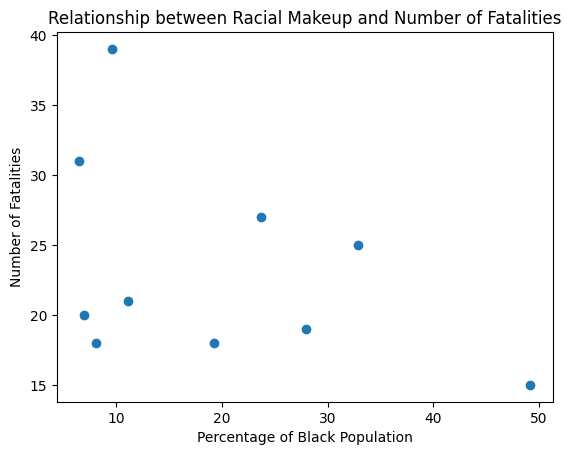

In [131]:
#Here i can check if there is a correlation between black population in a city and shootings
merged_df = pd.merge(top_cities, top10_cities, on='city')

# create scatter plot
plt.scatter(merged_df['share_black'], merged_df['id'])
plt.xlabel('Percentage of Black Population')
plt.ylabel('Number of Fatalities')
plt.title('Relationship between Racial Makeup and Number of Fatalities')
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [134]:
df_state_count = df_fatalities.groupby('state',as_index=False).count()

fig = px.choropleth(df_state_count, 
                    locations='state', # Spatial coordinates
                    locationmode='USA-states',
                    color='id', # your count column
                    scope="usa",
                    title='Fatalities per State',
                    labels={'id':'Number of Fatalities','state':'State'},
                    hover_name="state"
                    )
fig.show()

In [135]:
#seems that the poorer states have less shootings but i imagine it has to do with the population
#cali is the most populous state so it probably its no wonder it has the most shootings
poverty_per_state

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96
18,LA,22.34
40,SC,22.16
49,WV,21.13
36,OK,20.66
1,AL,20.65


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [153]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
#df_fatalities['month_year'] = df_fatalities['date'].dt.strftime('%B-%Y')
df_fatalities['month_year'] = df_fatalities['date'].dt.to_period('M')

deaths_over_time = df_fatalities.groupby('month_year',as_index=False).count()
#deaths_over_time['month_year'] = pd.to_datetime(deaths_over_time['month_year'])
deaths_over_time



,month_year,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01,70,70,70,70,70,70,70,70,70,70,70,70,70,70
1,2015-02,78,78,78,78,78,78,78,78,78,78,78,78,78,78
2,2015-03,87,87,87,87,87,87,87,87,87,87,87,87,87,87
3,2015-04,88,88,88,88,88,88,88,88,88,88,88,88,88,88
4,2015-05,85,85,85,85,85,85,85,85,85,85,85,85,85,85
5,2015-06,68,68,68,68,68,68,68,68,68,68,68,68,68,68
6,2015-07,85,85,85,85,85,85,85,85,85,85,85,85,85,85
7,2015-08,86,86,86,86,86,86,86,86,86,86,86,86,86,86
8,2015-09,90,90,90,90,90,90,90,90,90,90,90,90,90,90
9,2015-10,89,89,89,89,89,89,89,89,89,89,89,89,89,89


In [154]:
#the number of fatalities dropped massively in the last 6 months
fig = px.line(deaths_over_time, x='month_year', y='id', 
              labels={'month_year':'month_year','id':'Number of Deaths'},
              title='Number of Death over time')
fig.show()

TypeError: Object of type Period is not JSON serializable

In [156]:
#lets figure out how to plot with the month_year column

/tmp/ipykernel_2060/3146056077.py:1: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')



,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,month_year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,2.87,2.87,2.87,2.87,2.87,2.87,2.87,2.87,2.87,2.87,2.87,2.87,2.87,2.87
875,2.87,2.87,2.87,2.87,2.87,2.87,2.87,2.87,2.87,2.87,2.87,2.87,2.87,2.87
876,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90,2.90
877,2.93,2.93,2.93,2.93,2.93,2.93,2.93,2.93,2.93,2.93,2.93,2.93,2.93,2.93


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).